LiDAR image dtype: float32


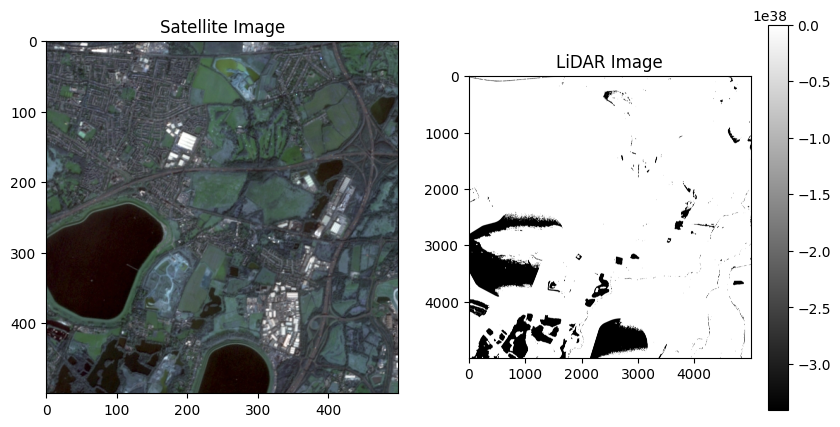

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import rasterio

# Load RGB satellite images
img_RGB = cv2.imread('data/20230215-SE2B-CGG-GBR-MS3-L3-RGB-preview.jpg', cv2.IMREAD_COLOR)

# Open the LiDAR image using rasterio
with rasterio.open('data/DSM_TQ0075_P_12757_20230109_20230315.tif') as lidar_src:
    lidar_image = lidar_src.read(1)  # Read the first band (assuming single-band image)

# Get the data type and print information
print(f"LiDAR image dtype: {lidar_image.dtype}")

# Show the images for verification
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Satellite Image')
plt.imshow(img_RGB)
# Show the LiDAR image
plt.subplot(1, 2, 2)
plt.imshow(lidar_image, cmap='gray')
plt.title('LiDAR Image')
plt.colorbar()
plt.show()